<div class="alert alert-success" role="alert">
  <h1 class="alert-heading">Estadística Básica</h1>
  <h3 class="alert-heading">Prof. Enrique Mejía Ospino, emejia@uis.edu.co</h3>
  <h4 class="alert-heading">Escuela de Química</h4>
  <h5 class="alert-heading">Universidad Industrial de Santander</h5>
  <p>
  </div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sio

<div class="alert alert-success">

<font color=green size=5>**ESTADÍSTICA BÁSICA DE DATOS:**
<p style="text-align:justify">
<font color=green size=3>La estadística suele ser definida como la ciencia de aprender de los datos o como la ciencia de obtener conclusiones en la presencia de incertidumbre. Se relaciona principalmente con la recolección, análisis e interpretación de datos, así como también con la efectiva comunicación y presentación de los resultados basados en esos datos. Como por datos entendemos a cualquier clase de información grabada, la estadística juega un papel importante en las disciplinas científicas.

La estadística suele ser dividida en dos grandes ramas:
<font color=green size=3><p style="text-align:justify">***La estadística descriptiva***: La cual se dedica a recolectar, ordenar, analizar y representar a un conjunto de datos, con el fin de describir apropiadamente las características de este. Calcula los parámetros estadísticos que describen el conjunto estudiado. Algunas de las herramientas que utiliza son gráficos, medidas de frecuencias, medidas de centralización, medidas de posición, medidas de dispersión, entre otras.
<p style="text-align:justify">
    
<font color=green size=3><p style="text-align:justify">***La estadistica inferencial***: La cual estudia cómo sacar conclusiones generales para toda la población a partir del estudio de una muestra, y el grado de fiabilidad o significación de los resultados obtenidos. Sus principales herramientas son el muestreo, la estimación de parámetros y el contraste de hipótesis.</p>

In [3]:
import scipy.io #scipy.io me permite leer datos construidos en matlab
espectros = scipy.io.loadmat('C:/Users/Enrique Mejia/Documents/Análisis_Interpretación_Datos/Datos/espectros.mat')# este archivo contiene las intensidades de
# 83 espectros FTIR de crudos colombianos y será utilizados como ejemplo en esta sección
# del curso
from scipy import stats # importando scipy.stats

In [33]:
espectros # Observamos la estructura del archivo leído

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu May  9 10:44:51 2019',
 '__version__': '1.0',
 '__globals__': [],
 'espectros': array([[1.10966015e-02, 1.11991453e-02, 1.09848555e-02, ...,
         7.51200917e-03, 7.50250605e-03, 7.49422931e-03],
        [1.24679071e-02, 1.24862852e-02, 1.24491321e-02, ...,
         3.97298076e-03, 3.97471363e-03, 3.97558006e-03],
        [1.86894114e-02, 1.82859382e-02, 1.78871333e-02, ...,
         1.27441867e-06, 5.94731911e-06, 1.27443550e-05],
        ...,
        [1.45187850e-02, 1.53134737e-02, 1.64545678e-02, ...,
         1.18493698e-02, 1.18557313e-02, 1.18633563e-02],
        [1.20981036e-02, 1.35690496e-02, 1.48558137e-02, ...,
         4.20803575e-03, 4.20305128e-03, 4.19621426e-03],
        [3.64273530e-02, 3.65206370e-02, 3.63052743e-02, ...,
         9.59961893e-06, 5.00847036e-06, 0.00000000e+00]])}

In [4]:
espectros['espectros'] # De la estructura se observa que los datos están en un arreglo
# que se llama espectros, estos son los que interessan para el ejemplo

array([[1.10966015e-02, 1.11991453e-02, 1.09848555e-02, ...,
        7.51200917e-03, 7.50250605e-03, 7.49422931e-03],
       [1.24679071e-02, 1.24862852e-02, 1.24491321e-02, ...,
        3.97298076e-03, 3.97471363e-03, 3.97558006e-03],
       [1.86894114e-02, 1.82859382e-02, 1.78871333e-02, ...,
        1.27441867e-06, 5.94731911e-06, 1.27443550e-05],
       ...,
       [1.45187850e-02, 1.53134737e-02, 1.64545678e-02, ...,
        1.18493698e-02, 1.18557313e-02, 1.18633563e-02],
       [1.20981036e-02, 1.35690496e-02, 1.48558137e-02, ...,
        4.20803575e-03, 4.20305128e-03, 4.19621426e-03],
       [3.64273530e-02, 3.65206370e-02, 3.63052743e-02, ...,
        9.59961893e-06, 5.00847036e-06, 0.00000000e+00]])

In [5]:
datos_esp=pd.DataFrame(espectros['espectros']) # Para mayor comunidad los datos de
datos_esp # interés son convertidos en dataframe.

,0,1,2,3,4,5,6,7,8,9,...,7458,7459,7460,7461,7462,7463,7464,7465,7466,7467
0,0.011097,0.011199,0.010985,0.010543,0.010022,0.009558,0.009238,0.009085,0.009071,0.009146,...,0.007546,0.007546,0.007545,0.007542,0.007537,0.007530,0.007522,0.007512,0.007503,0.007494
1,0.012468,0.012486,0.012449,0.012386,0.012352,0.012396,0.012543,0.012782,0.013081,0.013398,...,0.003964,0.003966,0.003967,0.003967,0.003967,0.003969,0.003970,0.003973,0.003975,0.003976
2,0.018689,0.018286,0.017887,0.017561,0.017360,0.017291,0.017324,0.017413,0.017528,0.017675,...,0.000043,0.000035,0.000026,0.000016,0.000008,0.000003,0.000000,0.000001,0.000006,0.000013
3,0.015869,0.015885,0.015737,0.015513,0.015276,0.015056,0.014842,0.014605,0.014319,0.013989,...,0.011477,0.011465,0.011455,0.011450,0.011447,0.011448,0.011453,0.011460,0.011469,0.011480
4,0.006940,0.006977,0.006766,0.006420,0.006081,0.005889,0.005934,0.006241,0.006779,0.007492,...,0.003165,0.003165,0.003163,0.003158,0.003152,0.003147,0.003144,0.003142,0.003143,0.003145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.012003,0.012234,0.012054,0.011595,0.011025,0.010495,0.010095,0.009845,0.009712,0.009647,...,0.000554,0.000552,0.000548,0.000543,0.000539,0.000535,0.000533,0.000533,0.000534,0.000538
78,0.015255,0.014849,0.014527,0.014288,0.014117,0.013987,0.013858,0.013693,0.013464,0.013171,...,0.011690,0.011689,0.011688,0.011688,0.011689,0.011689,0.011687,0.011686,0.011684,0.011684
79,0.014519,0.015313,0.016455,0.017791,0.019159,0.020383,0.021306,0.021820,0.021896,0.021586,...,0.011802,0.011811,0.011820,0.011828,0.011834,0.011839,0.011844,0.011849,0.011856,0.011863
80,0.012098,0.013569,0.014856,0.015892,0.016641,0.017102,0.017313,0.017343,0.017274,0.017184,...,0.004172,0.004182,0.004192,0.004201,0.004207,0.004210,0.004211,0.004208,0.004203,0.004196


<div class="alert alert-success">

<font color=green size=3><p style="text-align:justify">Los datos almacendos en "datos_esp" está organizados en 83 filas y 7468 columnas, lo que signífica que cada fila corresponde al espectro infrarrojo de una muestra. Si queremos organizar los datos en forma inversa, podemos obtener la transpuesta de la siguiente forma:

In [6]:
datos_espT=datos_esp.T
datos_espT.head()

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
0,0.011097,0.012468,0.018689,0.015869,0.006940,0.006935,0.016425,0.025610,0.011233,0.015542,...,0.037838,0.025816,0.017109,0.014263,0.040873,0.012003,0.015255,0.014519,0.012098,0.036427
1,0.011199,0.012486,0.018286,0.015885,0.006977,0.007533,0.015106,0.025668,0.010532,0.015678,...,0.036763,0.026283,0.017330,0.014050,0.040392,0.012234,0.014849,0.015313,0.013569,0.036521
2,0.010985,0.012449,0.017887,0.015737,0.006766,0.008007,0.013928,0.025952,0.010026,0.015707,...,0.035667,0.026582,0.017588,0.013578,0.039723,0.012054,0.014527,0.016455,0.014856,0.036305
3,0.010543,0.012386,0.017561,0.015513,0.006420,0.008331,0.013067,0.026408,0.009778,0.015686,...,0.034714,0.026754,0.017884,0.012980,0.038974,0.011595,0.014288,0.017791,0.015892,0.035926
4,0.010022,0.012352,0.017360,0.015276,0.006081,0.008482,0.012639,0.026994,0.009770,0.015676,...,0.034033,0.026838,0.018222,0.012398,0.038242,0.011025,0.014117,0.019159,0.016641,0.035521


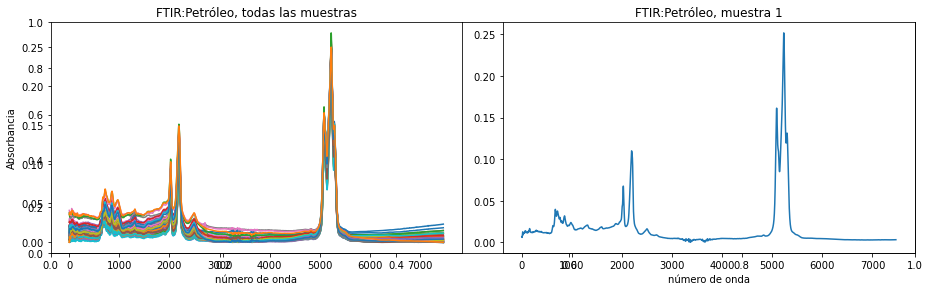

In [11]:
fig, esp= plt.subplots()
esp1 = fig.add_subplot(1, 2, 1)
esp2 = fig.add_subplot(1, 2, 2)
esp1.plot(datos_espT)
esp1.set_title("FTIR:Petróleo, todas las muestras")
esp1.set_xlabel("número de onda")
esp1.set_ylabel("Absorbancia")
esp2.plot(datos_espT[4])
esp2.set_title("FTIR:Petróleo, muestra 1")
esp2.set_xlabel("número de onda")
#esp2.set_ylabel("Absorbancia")
plt.subplots_adjust(left=1, wspace=0.1, hspace=0.5, bottom=0.1, top=0.9, right=3)

<div class="alert alert-success">

### Conceptos básicos de la estadística descriptiva
<font color=green size=3><p style="text-align:justify">En estadística descriptiva se utilizan distintas medidas para intentar describir las propiedades de nuestros datos, algunos de los conceptos básicos, son:

**Media aritmética**: La media aritmética es el valor obtenido al sumar todos los datos y dividir el resultado entre el número total elementos. Se suele representar con la letra griega μ. Si tenemos una muestra de n valores, xi, la media aritmética, μ, es la suma de los valores divididos por el numero de elementos; en otras palabras:
    $$\mu = \frac{1}{n} \sum_{i}x_i$$

In [9]:
datosr = np.random.randint(10, size=100) # datos n00rmalmente distribuidos
datosr

array([9, 6, 1, 5, 9, 4, 6, 8, 3, 1, 4, 7, 6, 1, 0, 9, 0, 9, 0, 9, 6, 2,
       4, 7, 3, 7, 5, 6, 2, 9, 9, 1, 4, 4, 7, 5, 0, 3, 3, 6, 3, 2, 2, 7,
       5, 2, 7, 8, 5, 7, 2, 3, 7, 2, 2, 6, 0, 4, 6, 3, 8, 9, 8, 5, 7, 3,
       7, 8, 4, 2, 1, 1, 0, 9, 9, 4, 0, 7, 1, 3, 2, 9, 0, 1, 4, 2, 9, 4,
       5, 3, 6, 7, 6, 0, 7, 6, 9, 3, 9, 9])

In [10]:
datosr.mean()

4.7

In [11]:
np.mean(datosr)

4.7

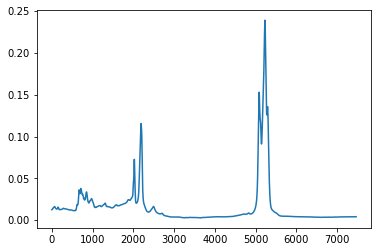

In [12]:
datos_media=datos_esp.mean()#np.mean(datos_espT)
plt.plot(datos_media)

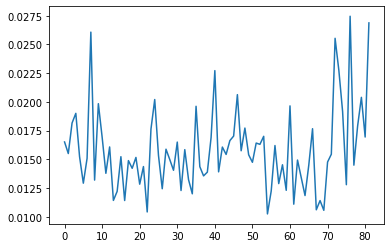

In [13]:
datosf=datos_esp.mean(axis=1) # Calcula la media a lo largo de las columnas
plt.plot(datosf)

In [14]:
datoss=datos_esp[4800:5800].sum(axis=0) # Suma a lo lar de las filas entre las columnas indicadas
datoss

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
7463    0.0
7464    0.0
7465    0.0
7466    0.0
7467    0.0
Length: 7468, dtype: float64

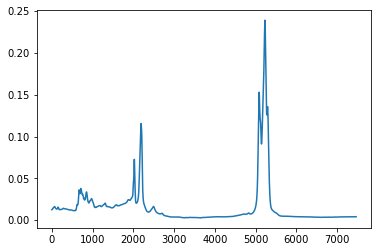

In [15]:
datosc=datos_esp.mean(axis=0) # media a lo largo de las filas
plt.plot(datosc)

<p style="text-align:justify"><div class="alert alert-success">

**Moda**: La moda es el valor que tiene mayor frecuencia absoluta. Se representa con $M_0$.


In [16]:
stats.mode(datosr) # Calcula la moda

ModeResult(mode=array([9]), count=array([15]))

<p style="text-align:justify"><div class="alert alert-success">

**Mediana**: La mediana es el valor que ocupa el lugar central de todos los datos cuando éstos están ordenados de menor a mayor. Se representa con $\widetilde{x}$.


In [17]:
datosr, np.median(datosr)

(array([9, 6, 1, 5, 9, 4, 6, 8, 3, 1, 4, 7, 6, 1, 0, 9, 0, 9, 0, 9, 6, 2,
        4, 7, 3, 7, 5, 6, 2, 9, 9, 1, 4, 4, 7, 5, 0, 3, 3, 6, 3, 2, 2, 7,
        5, 2, 7, 8, 5, 7, 2, 3, 7, 2, 2, 6, 0, 4, 6, 3, 8, 9, 8, 5, 7, 3,
        7, 8, 4, 2, 1, 1, 0, 9, 9, 4, 0, 7, 1, 3, 2, 9, 0, 1, 4, 2, 9, 4,
        5, 3, 6, 7, 6, 0, 7, 6, 9, 3, 9, 9]),
 5.0)

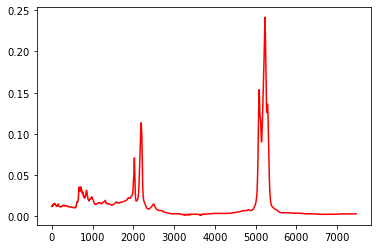

In [18]:
np.median(datos_espT, 1) # media aritmetica de cada fila
plt.plot(np.median(datos_esp, 0), color='r')

<p style="text-align:justify"><div class="alert alert-success">

**Varianza**: La varianza es la media aritmética del cuadrado de las desviaciones respecto a la media de una distribución estadística. La varianza intenta describir la dispersión de los datos. Se representa como $\sigma^2$.
$$\sigma^2 = \frac{\sum\limits_{i=1}^n(x_i - \mu)^2}{n}$$


In [19]:
np.var(datosr)

8.45

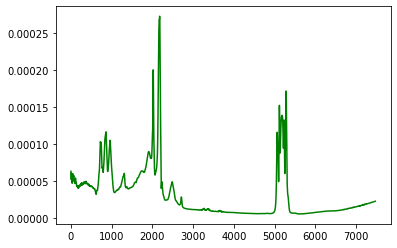

In [20]:
plt.plot(np.var(datos_esp, 0, ddof=1), color='g') # varianza de cada fila, ddof=delta deggree of freedom; el divisor en varianza es N-ddof

<p style="text-align:justify"><div class="alert alert-success">

**Desviación típica**: La desviación típica es la raíz cuadrada de la varianza. Se representa con la letra griega $\sigma$.
$$\sigma = \sqrt{\frac{\sum\limits_{i=1}^n(x_i - \mu)^2}{n}}$$


In [21]:
np.std(datosr)

2.9068883707497264

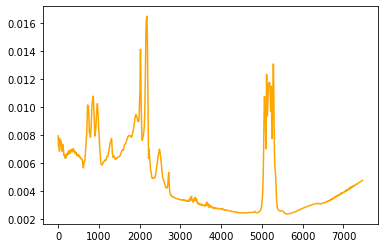

In [22]:
plt.plot(np.std(datos_espT, 1, ddof=1), color='orange') # varianza de cada fila

<p style="text-align:justify"><div class="alert alert-success">

**Correlación**: La correlación trata de establecer la relación o dependencia que existe entre las dos variables que intervienen en una distribución bidimensional. Es decir, determinar si los cambios en una de las variables influyen en los cambios de la otra. En caso de que suceda, diremos que las variables están correlacionadas o que hay correlación entre ellas. La correlación es positiva cuando los valores de las variables aumenta juntos; y es negativa cuando un valor de una variable se reduce cuando el valor de la otra variable aumenta.

In [23]:
np.corrcoef(datos_esp[0], datos_esp[1])

array([[1.        , 0.99793904],
       [0.99793904, 1.        ]])

In [24]:
datosr1 = np.random.randint(10, size=100)
datosr1

array([1, 7, 9, 6, 5, 4, 3, 9, 4, 3, 1, 5, 8, 7, 8, 8, 1, 5, 8, 5, 4, 6,
       9, 0, 6, 3, 5, 6, 6, 3, 0, 3, 1, 9, 4, 6, 9, 0, 8, 6, 4, 2, 7, 9,
       6, 8, 6, 4, 1, 5, 4, 1, 0, 8, 5, 2, 9, 2, 1, 4, 7, 8, 8, 8, 9, 4,
       1, 6, 5, 1, 7, 1, 9, 9, 8, 4, 9, 6, 6, 1, 4, 7, 9, 5, 4, 9, 1, 9,
       1, 3, 9, 0, 9, 8, 7, 4, 0, 0, 1, 0])

In [25]:
np.corrcoef(datosr, datosr1)

array([[ 1.        , -0.17071684],
       [-0.17071684,  1.        ]])

<p style="text-align:justify"><div class="alert alert-success">

**Covarianza**: La covarianza es el equivalente de la varianza aplicado a una variable bidimensional. Es la media aritmética de los productos de las desviaciones de cada una de las variables respecto a sus medias respectivas.La covarianza indica el sentido de la correlación entre las variables; Si $\sigma_{xy} > 0$ la correlación es directa; Si $\sigma_{xy} < 0$ la correlación es inversa.
$$\sigma_{xy} = \frac{\sum\limits_{i=1}^n(x_i - \mu_x)(y_i -\mu_y)}{n}$$

In [26]:
np.cov(datos_esp[0], datos_esp[1])

array([[6.31088327e-05, 6.19510560e-05],
       [6.19510560e-05, 6.10659688e-05]])

In [27]:
matrix = np.corrcoef(datos_esp).round(decimals=2)
matrix.shape

(82, 82)

<font color=violet>**Veamos algunas forma sencicillas de visualización.**

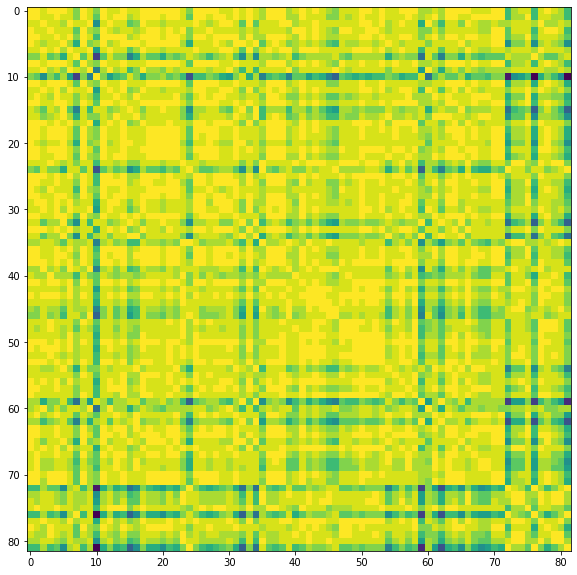

In [28]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.imshow(matrix)
plt.show()

<AxesSubplot:>

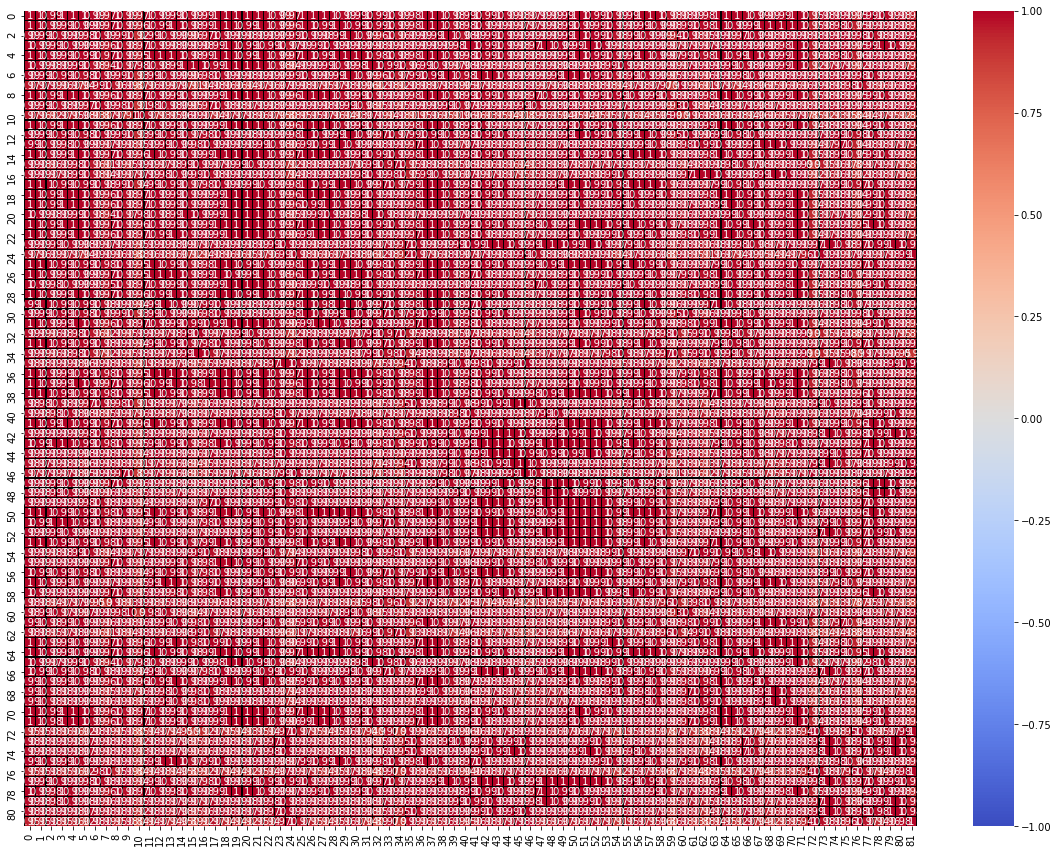

In [29]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(datos_espT.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', ax=ax, linewidths=0.1, linecolor='black')


In [51]:
corr = datos_espT.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

<font color=blue>**Si desea profundizar sobre estadística descriptiva en Python, puede consultar, entre otras, la de [Real Python](https://realpython.com/python-statistics/).**